Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


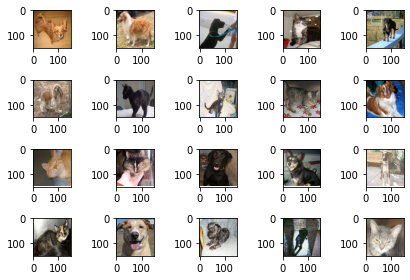

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/validation'

# ImageDataGenerator를 생성
# train data를 생성해주는 ImageDataGenerator, validation data를 생성해주는 ImageDataGenerator를 각각 만들어야 해요!
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,     # target directory
    classes=['cats', 'dogs'],   # cats, dogs 순서로 label 0, 1로 설정
                                # 만약 classes 속성을 생략하면 폴더 순서로 label이 결정 
    target_size=(150,150),      # 일반적으로 정사각형 행태로 resize (resize 크기는 CNN의 구조에 따라서 달라져요!)                         
    batch_size=20,              # 한번에 20개의 image 파일을 가져와서 pixel데이터로 변환
                                # label에 상관없이 가져와요!      
    class_mode='binary'         # 고양이와 멍멍이 2개의 label만 존재하기 때문에 2진분류이고 binary classification
                                # 다중분류인 경우 'categorical'을 이용해요(default 값) - (one-hot encoding)
                                # 'sparse'도 이용가능해요                    
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,             # target directory
    classes=['cats', 'dogs'],   # cats, dogs 순서로 label 0, 1로 설정
                                # 만약 classes 속성을 생략하면 폴더 순서로 label이 결정 
    target_size=(150,150),      # 일반적으로 정사각형 행태로 resize (resize 크기는 CNN의 구조에 따라서 달라져요!)                         
    batch_size=20,              # 한번에 20개의 image 파일을 가져와서 pixel데이터로 변환
                                # label에 상관없이 가져와요!      
    class_mode='binary'         # 고양이와 멍멍이 2개의 label만 존재하기 때문에 2진분류이고 binary classification
                                # 다중분류인 경우 'categorical'을 이용해요(default 값) - (one-hot encoding)
                                # 'sparse'도 이용가능해요                    
)

# generator를 이용해 보아요!
for x_data, t_data in train_generator:
    print(x_data.shape)   # (20,150,150,3)
    print(t_data.shape)   # (20,)
    break;

# 그림 이미지를 matplotlib을 이용해서 출력
fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
    for idx, img_data in enumerate(data_batch):
         fig_arr[idx].imshow(img_data)
    break;

fig.tight_layout()
plt.show()

# 다음 단계는 CNN을 구성하고 학습을 시키는 단계예요!!
# 사실 이단계는 MNIST와 유사해요! Convolution Layer와 Pooling Layer를 추가
